<a href="https://colab.research.google.com/github/jraval/DSPT9_Build1_coronavirus/blob/main/Coronavirus_maskwearing_bycounty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the original data set for my project that I pulled from the New York Times Github.  My plan is to replace the values of the CountyFP column with the names of states.  Once I do that, I'm going to create two groups, blue states and red states and do a comparison of each with the attributes already listed in the original data set.

The code block below was performed to import different libraries needed for the various functions that enabled the data visualizations in the graphs below.

In [6]:
#This was an attempt at creating a data visualization of all persons wearing masks within
# the US.  I imported folium to attempt this.  Please disregard and move down.
!pip install folium
import folium as folium

In [5]:
!pip install pyshp

     |████████████████████████████████| 225kB 4.8MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=d28fd72ee85981cd49070096cb7dca0bbd28335658b74ce7b1af63571a5a6275
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp


In [3]:
!pip install chart-studio

     |████████████████████████████████| 71kB 3.9MB/s 


In [7]:
#All the imports needed for this project.  Some of the imports were not needed
#but I coded them in as I may need them in the future, I intend on building on
# project.
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tl
import plotly.express as px
import pandas as pd
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
from bs4 import BeautifulSoup
import unicodedata
from itertools import cycle, islice
#Import regex module
import re
pd.set_option('display.max_rows', None)
 # Importing all the libraries needed
# - To read in data
import csv 
# - To work with shape files
from descartes import PolygonPatch 

import shapefile as shp 
from shapely.geometry.polygon import Polygon
# - To make graphs 

import matplotlib.patches as mpatches
import json

import plotly.express as px
 
#import unicodecsv
corona_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv'
corona = pd.read_csv(corona_url)
corona_parsers = pd.io.parsers.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv', dtype={'https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/': 'str'})
#corona_url_zip_proper = pandas.io.parsers.read_csv('zip/sample.csv', dtype={'zip': 'str'})
#print(corona_url_zip_proper)
pd.set_option("display.max_rows", 900) 
corona.head(10)

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
5,1011,0.031,0.040,0.144,0.286,0.500
6,1013,0.102,0.053,0.257,0.137,0.451
7,1015,0.152,0.108,0.130,0.167,0.442
8,1017,0.117,0.037,0.150,0.136,0.560
9,1019,0.135,0.027,0.161,0.158,0.520


In [12]:
#Crucial to my dataset and creating readable visualizations.  I needed this library
# to replace fip codes with state names.
!pip install us

     |████████████████████████████████| 133kB 6.0MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11928 sha256=e77889a5130d508e0f783a70e2aa89eef39cc498f6c71bdbf40e560486f2fe4e
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74742 sha256=84e409530723120ea241d7d6f6111e32e29000b978634fc7f5c9048034c886fa
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [13]:
import us

In [14]:
#Using the library I imported from above, I was able to create a key-value dictionary
#so I could replace fips codes with state names
us.states.MD
us.states.STATES
us.states.mapping('fips', 'name')
di = us.states.mapping('fips', 'name')
di

{'01': 'Alabama',
 '02': 'Alaska',
 '04': 'Arizona',
 '05': 'Arkansas',
 '06': 'California',
 '08': 'Colorado',
 '09': 'Connecticut',
 '10': 'Delaware',
 '11': 'District of Columbia',
 '12': 'Florida',
 '13': 'Georgia',
 '15': 'Hawaii',
 '16': 'Idaho',
 '17': 'Illinois',
 '18': 'Indiana',
 '19': 'Iowa',
 '20': 'Kansas',
 '21': 'Kentucky',
 '22': 'Louisiana',
 '23': 'Maine',
 '24': 'Maryland',
 '25': 'Massachusetts',
 '26': 'Michigan',
 '27': 'Minnesota',
 '28': 'Mississippi',
 '29': 'Missouri',
 '30': 'Montana',
 '31': 'Nebraska',
 '32': 'Nevada',
 '33': 'New Hampshire',
 '34': 'New Jersey',
 '35': 'New Mexico',
 '36': 'New York',
 '37': 'North Carolina',
 '38': 'North Dakota',
 '39': 'Ohio',
 '40': 'Oklahoma',
 '41': 'Oregon',
 '42': 'Pennsylvania',
 '44': 'Rhode Island',
 '45': 'South Carolina',
 '46': 'South Dakota',
 '47': 'Tennessee',
 '48': 'Texas',
 '49': 'Utah',
 '50': 'Vermont',
 '51': 'Virginia',
 '53': 'Washington',
 '54': 'West Virginia',
 '55': 'Wisconsin',
 '56': 'Wyoming

In [15]:
#Leading zeroes were an issue as FIPS codes have them but Python removes them from integers,
#decimals and floats.  Therefore it was necessary to turn the column into strings and reinsert the
#leading zero.
corona_parsers['COUNTYFP']=corona_parsers['COUNTYFP'].apply(lambda x: '{0:0>5}'.format(x))

print(corona_parsers)
corona_parsers.dtypes


     COUNTYFP  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0       01001  0.053   0.074      0.134       0.295   0.444
1       01003  0.083   0.059      0.098       0.323   0.436
2       01005  0.067   0.121      0.120       0.201   0.491
3       01007  0.020   0.034      0.096       0.278   0.572
4       01009  0.053   0.114      0.180       0.194   0.459
...       ...    ...     ...        ...         ...     ...
3137    56037  0.061   0.295      0.230       0.146   0.268
3138    56039  0.095   0.157      0.160       0.247   0.340
3139    56041  0.098   0.278      0.154       0.207   0.264
3140    56043  0.204   0.155      0.069       0.285   0.287
3141    56045  0.142   0.129      0.148       0.207   0.374

[3142 rows x 6 columns]


COUNTYFP       object
NEVER         float64
RARELY        float64
SOMETIMES     float64
FREQUENTLY    float64
ALWAYS        float64
dtype: object

In [16]:
#There is an easier way to do this but I had problems creating a loop, for me, at
# this time, it was just faster to copy and paste each fip code.  So the reason for this 
# was to replace county codes with fips codes.  What are FIPS codes?  FIPS codes are
#identifers for counties and states. Each county in the USA has a unique code.  The
#first two numbers identify a state, which is unique and the last three identify the 
#county.  It is similar to a zip code.
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'01.+', '01')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'02.+', '02')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'04.+', '04')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'05.+', '05')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'06.+', '06')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'08.+', '08')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'09.+', '09')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'10.+', '10')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'11.+', '11')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'12.+', '12')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'13.+', '13')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'14.+', '14')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'15.+', '15')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'16.+', '16')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'17.+', '17')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'18.+', '18')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'19.+', '19')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'20.+', '20')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'21.+', '21')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'22.+', '22')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'23.+', '23')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'24.+', '24')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'25.+', '25')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'26.+', '26')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'27.+', '27')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'28.+', '28')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'29.+', '29')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'30.+', '30')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'31.+', '31')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'32.+', '32')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'33.+', '33')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'34.+', '34')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'35.+', '35')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'36.+', '36')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'37.+', '37')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'38.+', '38')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'39.+', '39')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'40.+', '40')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'41.+', '41')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'42.+', '42')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'43.+', '43')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'44.+', '44')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'45.+', '45')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'46.+', '46')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'47.+', '47')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'48.+', '48')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'49.+', '49')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'50.+', '50')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'51.+', '51')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'52.+', '52')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'53.+', '53')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'54.+', '54')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'55.+', '55')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'56.+', '56')



In [17]:
#Earlier, I parsed the dataframe to determine if there were any null values.
corona_parsers

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,01,0.053,0.074,0.134,0.295,0.444
1,01,0.083,0.059,0.098,0.323,0.436
2,01,0.067,0.121,0.120,0.201,0.491
3,01,0.020,0.034,0.096,0.278,0.572
4,01,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56,0.061,0.295,0.230,0.146,0.268
3138,56,0.095,0.157,0.160,0.247,0.340
3139,56,0.098,0.278,0.154,0.207,0.264
3140,56,0.204,0.155,0.069,0.285,0.287


In [18]:
#This code was used to replace the column names from 'countyfp' to 'states' 
corona_parsers["COUNTYFP"].replace(di, inplace=True)
corona_parsers.rename(columns={'COUNTYFP':'STATES'}, inplace=True) 


In [19]:
#Before I learned a shorter method, I created variables for each state.  I still
#may use them in the future again for comparing individual states.
Alabama = corona_parsers.loc[corona_parsers['STATES'] =='Alabama']
Idaho = corona_parsers.loc[corona_parsers['STATES'] =='Idaho']
Montana = corona_parsers.loc[corona_parsers['STATES'] =='Montana']
North_Dakota  = corona_parsers.loc[corona_parsers['STATES'] =='North Dakota ']
Wyoming  = corona_parsers.loc[corona_parsers['STATES'] =='Wyoming ']
South_Dakota = corona_parsers.loc[corona_parsers['STATES'] =='South Dakota']
Texas = corona_parsers.loc[corona_parsers['STATES'] =='Texas']
Utah = corona_parsers.loc[corona_parsers['STATES'] =='Utah']
Nebraska = corona_parsers.loc[corona_parsers['STATES'] =='Nebraska']
Arizona = corona_parsers.loc[corona_parsers['STATES'] =='Arizona']
Kansas = corona_parsers.loc[corona_parsers['STATES'] =='Kansas']
Missouri = corona_parsers.loc[corona_parsers['STATES'] =='Missouri']
Oklahoma = corona_parsers.loc[corona_parsers['STATES'] =='Oklahoma']
Arkansas = corona_parsers.loc[corona_parsers['STATES'] =='Arkansas']
Louisiana = corona_parsers.loc[corona_parsers['STATES'] =='Louisiana']
Kentucky = corona_parsers.loc[corona_parsers['STATES'] =='Kentucky']
Mississippi  = corona_parsers.loc[corona_parsers['STATES'] =='Mississippi ']
Tennessee = corona_parsers.loc[corona_parsers['STATES'] =='Tennessee']
South_Carolina = corona_parsers.loc[corona_parsers['STATES'] =='South Carolina']
Georgia = corona_parsers.loc[corona_parsers['STATES'] =='Georgia']
Alaska = corona_parsers.loc[corona_parsers['STATES'] =='Alaska']
West_Virginia = corona_parsers.loc[corona_parsers['STATES'] =='West Virginia']
print(Alabama)
Alabama.describe()

     STATES  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0   Alabama  0.053   0.074      0.134       0.295   0.444
1   Alabama  0.083   0.059      0.098       0.323   0.436
2   Alabama  0.067   0.121      0.120       0.201   0.491
3   Alabama  0.020   0.034      0.096       0.278   0.572
4   Alabama  0.053   0.114      0.180       0.194   0.459
5   Alabama  0.031   0.040      0.144       0.286   0.500
6   Alabama  0.102   0.053      0.257       0.137   0.451
7   Alabama  0.152   0.108      0.130       0.167   0.442
8   Alabama  0.117   0.037      0.150       0.136   0.560
9   Alabama  0.135   0.027      0.161       0.158   0.520
10  Alabama  0.060   0.070      0.058       0.194   0.618
11  Alabama  0.049   0.038      0.126       0.219   0.568
12  Alabama  0.049   0.088      0.164       0.268   0.430
13  Alabama  0.148   0.158      0.195       0.169   0.329
14  Alabama  0.151   0.125      0.138       0.217   0.368
15  Alabama  0.101   0.152      0.094       0.186   0.466
16  Alabama  0

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
count,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.081567,0.081090,0.146612,0.215343,0.475313
std,0.042396,0.039358,0.050532,0.052959,0.081116
min,0.008000,0.024000,0.058000,0.122000,0.312000
25%,0.053000,0.051500,0.118000,0.179000,0.424000
50%,0.077000,0.074000,0.136000,0.201000,0.466000
75%,0.109500,0.101500,0.168000,0.252500,0.529500
max,0.187000,0.226000,0.328000,0.336000,0.639000


In [ ]:
corona_parsers.head(5)
#Checking if my datframe has the correct comlumns

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Alabama,0.053,0.074,0.134,0.295,0.444
1,Alabama,0.083,0.059,0.098,0.323,0.436
2,Alabama,0.067,0.121,0.120,0.201,0.491
3,Alabama,0.020,0.034,0.096,0.278,0.572
4,Alabama,0.053,0.114,0.180,0.194,0.459


In [20]:
corona_parsers.sample(100)
#checking to see I have other states besides Alabama

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
948,Kansas,0.071,0.044,0.095,0.250,0.540
2672,Texas,0.080,0.036,0.056,0.214,0.615
1060,Kentucky,0.057,0.081,0.210,0.296,0.357
815,Iowa,0.248,0.132,0.258,0.068,0.294
603,Illinois,0.103,0.080,0.190,0.187,0.441
269,Colorado,0.006,0.002,0.050,0.187,0.754
876,Iowa,0.030,0.125,0.172,0.210,0.462
2104,Ohio,0.052,0.035,0.084,0.219,0.609
1871,New York,0.011,0.018,0.054,0.195,0.722
2820,Virginia,0.001,0.019,0.055,0.100,0.824


In [21]:
frames = [Alabama, Idaho, North_Dakota, South_Dakota, South_Carolina, West_Virginia, Tennessee, Texas, Montana, Wyoming, Utah, Nebraska, Arizona, Kansas, Missouri, Oklahoma, Arkansas, Louisiana, Kentucky, Mississippi, Georgia, Alaska]
#creating a variable list

In [22]:
result = pd.concat(frames)
frames_concat = result.sort_values(by='STATES', ascending=True)
frames_concat.head(100)
#making the list alphabetical

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Alabama,0.053,0.074,0.134,0.295,0.444
36,Alabama,0.049,0.037,0.107,0.179,0.628
37,Alabama,0.107,0.045,0.132,0.189,0.527
38,Alabama,0.093,0.119,0.141,0.179,0.469
39,Alabama,0.162,0.080,0.088,0.251,0.419
40,Alabama,0.053,0.064,0.138,0.183,0.562
41,Alabama,0.102,0.034,0.133,0.336,0.395
42,Alabama,0.120,0.073,0.145,0.199,0.464
43,Alabama,0.008,0.033,0.241,0.172,0.545
44,Alabama,0.062,0.050,0.123,0.177,0.589


In [23]:
print(Alabama.shape)
red_states = frames_concat
red_states.shape
#checking the size of the Alabama dataframe

(67, 6)


(1564, 6)

In [24]:
Alabama
#seeing that it's still there.

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Alabama,0.053,0.074,0.134,0.295,0.444
1,Alabama,0.083,0.059,0.098,0.323,0.436
2,Alabama,0.067,0.121,0.120,0.201,0.491
3,Alabama,0.020,0.034,0.096,0.278,0.572
4,Alabama,0.053,0.114,0.180,0.194,0.459
5,Alabama,0.031,0.040,0.144,0.286,0.500
6,Alabama,0.102,0.053,0.257,0.137,0.451
7,Alabama,0.152,0.108,0.130,0.167,0.442
8,Alabama,0.117,0.037,0.150,0.136,0.560
9,Alabama,0.135,0.027,0.161,0.158,0.520


In [25]:
red_states.sample(10)
#again checking if other states are there

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
53,Alabama,0.031,0.060,0.169,0.157,0.584
2573,Texas,0.107,0.106,0.188,0.176,0.423
56,Alabama,0.069,0.067,0.080,0.213,0.570
2579,Texas,0.024,0.019,0.059,0.141,0.757
423,Georgia,0.098,0.134,0.123,0.203,0.441
403,Georgia,0.105,0.109,0.087,0.208,0.492
2624,Texas,0.086,0.037,0.088,0.190,0.599
3041,West Virginia,0.111,0.119,0.186,0.162,0.423
124,Arkansas,0.241,0.072,0.054,0.250,0.383
2177,Oklahoma,0.169,0.072,0.212,0.285,0.261


In [26]:
#Creating a blue state list
blue_states_list = ["Washington", "Oregon", "California", "Minnesota", "Illinois", "Maine", "Vermont", "New York", "Massachusetts", "Connecticut",
                    "New Jersey", "Rhode Island", "Delaware", "Maryland", "DC", "Hawaii"]

In [27]:
#Creating a blue state dataframe
blue_states = corona_parsers[corona_parsers['STATES'].isin(["Washington", "Oregon", "California", "Minnesota", "Illinois", "Maine", "Vermont", "New York", "Massachusetts", "Connecticut",
                    "New Jersey", "Rhode Island", "Delaware", "Maryland", "DC", "Hawaii"])] 



In [28]:
blue_states.shape
#checking sizesizes of df

(494, 6)

In [29]:
blue_states.sample(20)
#checking content of df

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
239,California,0.025,0.039,0.115,0.136,0.685
1871,New York,0.011,0.018,0.054,0.195,0.722
690,Illinois,0.086,0.142,0.128,0.300,0.345
1214,Maryland,0.006,0.011,0.063,0.116,0.804
2961,Washington,0.067,0.047,0.042,0.271,0.573
2963,Washington,0.106,0.013,0.059,0.069,0.753
189,California,0.015,0.043,0.111,0.204,0.626
1843,New York,0.050,0.050,0.057,0.107,0.736
1394,Minnesota,0.074,0.048,0.117,0.332,0.429
1356,Minnesota,0.061,0.176,0.193,0.383,0.186


In [ ]:
red_states.describe()

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
count,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000
mean,0.095126,0.093880,0.132722,0.213843,0.464421
std,0.058523,0.052218,0.055410,0.064459,0.129654
min,0.000000,0.000000,0.007000,0.029000,0.115000
25%,0.052750,0.056000,0.095000,0.172000,0.372000
50%,0.086000,0.086000,0.127000,0.212000,0.454000
75%,0.130000,0.123000,0.166000,0.251000,0.548000
max,0.432000,0.296000,0.422000,0.549000,0.880000


In [30]:
print(blue_states.describe())


            NEVER      RARELY   SOMETIMES  FREQUENTLY      ALWAYS
count  494.000000  494.000000  494.000000  494.000000  494.000000
mean     0.051573    0.056684    0.092038    0.185747    0.613889
std      0.049378    0.051962    0.059059    0.064039    0.168865
min      0.000000    0.000000    0.004000    0.050000    0.186000
25%      0.017000    0.017250    0.048000    0.139250    0.478250
50%      0.032000    0.040000    0.075000    0.178500    0.656000
75%      0.074750    0.078000    0.124750    0.225000    0.756750
max      0.325000    0.280000    0.311000    0.391000    0.889000


In [31]:
blue_states

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
186,California,0.019,0.008,0.055,0.123,0.795
187,California,0.025,0.085,0.088,0.190,0.612
188,California,0.045,0.013,0.099,0.188,0.655
189,California,0.015,0.043,0.111,0.204,0.626
190,California,0.045,0.019,0.098,0.276,0.562
191,California,0.027,0.031,0.092,0.151,0.700
192,California,0.018,0.016,0.039,0.121,0.806
193,California,0.010,0.135,0.112,0.196,0.547
194,California,0.028,0.042,0.072,0.183,0.675
195,California,0.021,0.022,0.059,0.156,0.741


In [ ]:
#@title
'''
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
print(blue_states.mean())
print(red_states.mean())
#blue_states.plot(figsize=(15,5))
blue_states.mean().plot(kind='bar', color = my_colors)
red_states.mean().plot(kind = 'bar');
'''

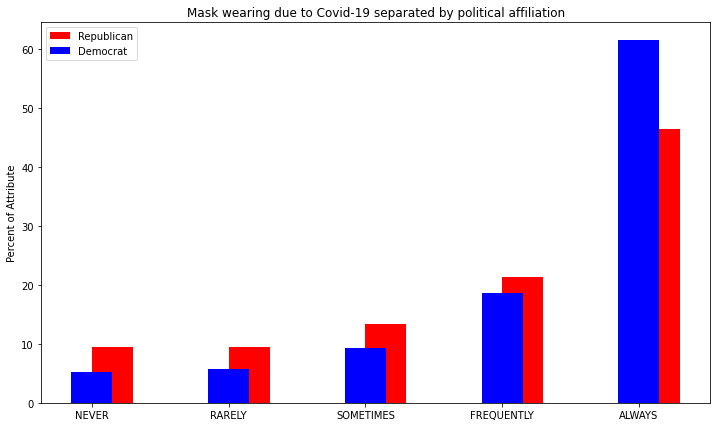

In [32]:
#N = 5
#ind = np.arange(N)
#width = 0.3 
#plt.grid(b=None)
#First Attempt at creating data visualization
plt.figure(figsize=(12,7))
plt.bar(['NEVER','RARELY','SOMETIMES','FREQUENTLY', 'ALWAYS'], (red_states.mean()*100), width= 0.3, align= 'edge', color = 'red', label = 'Republican')
plt.bar(['NEVER','RARELY','SOMETIMES','FREQUENTLY', 'ALWAYS'], (blue_states.mean()*100),width =0.3, align = 'center', color = 'blue', label = 'Democrat')
plt.ylabel('Percent of Attribute')
plt.title('Mask wearing due to Covid-19 separated by political affiliation')
plt.legend();

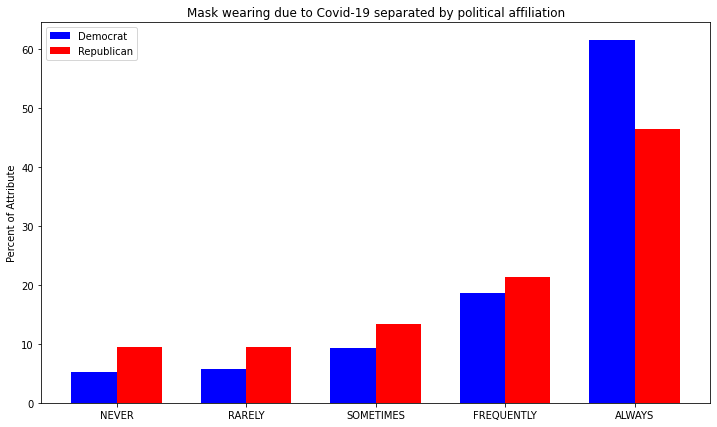

In [33]:
#2nd attempt of bar graph of means of various attributes of mask wearing to 
# protect from the pandemic
N = 5
blue_states_means = blue_states.mean()*100
red_states_means = red_states.mean()*100

plt.figure(figsize=(12,7))
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, blue_states_means, width, color = 'blue', label='Democrat')
plt.bar(ind + width, red_states_means, width, color = 'red',
    label='Republican')

plt.ylabel('Percent of Attribute')
plt.title('Mask wearing due to Covid-19 separated by political affiliation')

plt.xticks(ind + width/2, ('NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS'))
plt.legend(loc='best')
plt.show()


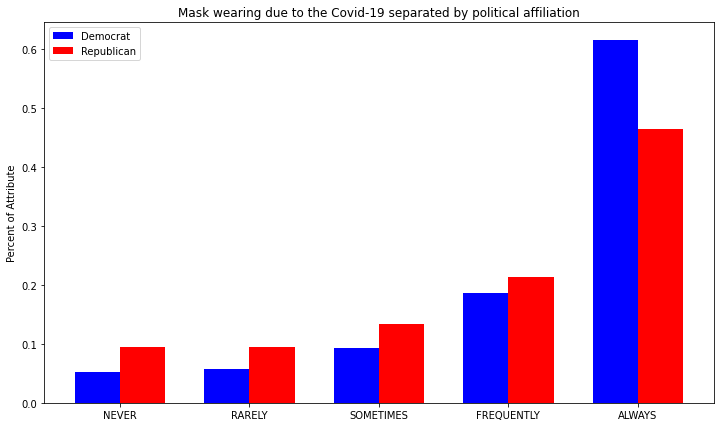

In [34]:
#3rd attempt for verification
N = 5
blue_states_means = blue_states.mean()
red_states_means = red_states.mean()
plt.figure(figsize=(12,7))
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, blue_states_means, width, color = 'blue', label='Democrat')
plt.bar(ind + width, red_states_means, width, color = 'red',
    label='Republican')
plt.ylabel('Percent of Attribute')
plt.title('Mask wearing due to the Covid-19 separated by political affiliation')
plt.xticks(ind + width / 2, ('NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS'))
plt.legend(loc='best')
plt.show()

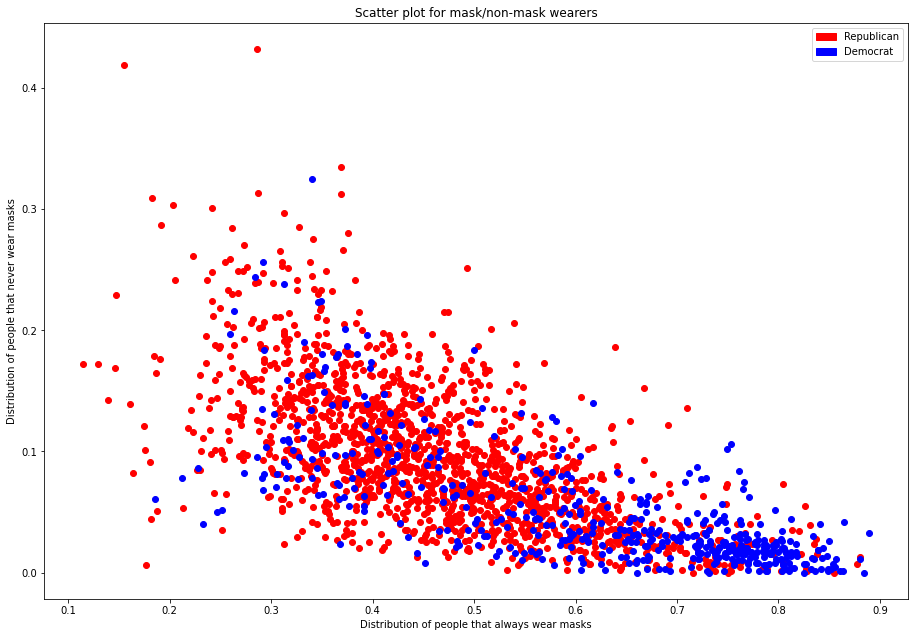

In [35]:
#scatter plot of all data, not just mean of those who wear a mask vs those who 
# don't
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.scatter(red_states['ALWAYS'], red_states['NEVER'], color='red')
ax.scatter(blue_states['ALWAYS'], blue_states['NEVER'], color='blue')
ax.set_xlabel('Distribution of people that always wear masks')
ax.set_ylabel('Distribution of people that never wear masks')
ax.set_title('Scatter plot for mask/non-mask wearers')

red_patch = mpatches.Patch(color='red', label='Republican')
blue_patch = mpatches.Patch(color='blue', label='Democrat')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

In [36]:
corona_parsers['STATES'].nunique()

51

In [37]:
corona_parsers.head(400)

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Alabama,0.053,0.074,0.134,0.295,0.444
1,Alabama,0.083,0.059,0.098,0.323,0.436
2,Alabama,0.067,0.121,0.120,0.201,0.491
3,Alabama,0.020,0.034,0.096,0.278,0.572
4,Alabama,0.053,0.114,0.180,0.194,0.459
5,Alabama,0.031,0.040,0.144,0.286,0.500
6,Alabama,0.102,0.053,0.257,0.137,0.451
7,Alabama,0.152,0.108,0.130,0.167,0.442
8,Alabama,0.117,0.037,0.150,0.136,0.560
9,Alabama,0.135,0.027,0.161,0.158,0.520


In [38]:
di2 = us.states.mapping('name', 'abbr')
print(di2)
corona_parsers["STATES"].replace(di2, inplace=True)
corona_parsers.head(5)


{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'American Samoa': 'AS', 'Guam': 'GU', 'Northern Mariana Islands': 'MP', 'Puer

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,AL,0.053,0.074,0.134,0.295,0.444
1,AL,0.083,0.059,0.098,0.323,0.436
2,AL,0.067,0.121,0.120,0.201,0.491
3,AL,0.020,0.034,0.096,0.278,0.572
4,AL,0.053,0.114,0.180,0.194,0.459


In [ ]:
 '''
red_states_mean = pd.DataFrame(
{"NEVER" : 0.095126,
"RARELY" : 0.093880,
"SOMETIMES" : 0.132722,
 "FREQUENTLY": 0.213843, 
 "ALWAYS": 0.464421 },
 index =  
  '''

'\nred_states_mean = pd.DataFrame(\n{"NEVER" : 0.095126,\n"RARELY" : 0.093880,\n"SOMETIMES" : 0.132722,\n"FREQUENTLY": 0.213843, \n"ALWAYS": 0.464421 },\nindex =  \n '

In [ ]:
#@title Hidden Code - Notes
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
print(red_states.mean())
red_states_mean.plot(figsize=(15,5))
red_states_mean.plot(kind = 'bar');
#red_states_mean.plot(kind='bar', color = my_colors);

In [ ]:
#@title Default title text
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
print(red_states.mean())
#red_states.plot(figsize=(15,5))
red_states.mean().plot(kind = 'bar');
#red_states.mean().plot(kind='bar', color = my_colors);

In [ ]:
#@title Default title text
ax_2 = blue_states.plot.bar(color={"NEVER": "red", "RARELY": "blue", "SOMETIMES": "green", "FREQUENTLY": "yellow", "ALWAYS": "black" })

In [39]:
always = red_states['ALWAYS']
red_states['ALWAYS_new'] = always
red_states

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,ALWAYS_new
0,Alabama,0.053,0.074,0.134,0.295,0.444,0.444
36,Alabama,0.049,0.037,0.107,0.179,0.628,0.628
37,Alabama,0.107,0.045,0.132,0.189,0.527,0.527
38,Alabama,0.093,0.119,0.141,0.179,0.469,0.469
39,Alabama,0.162,0.080,0.088,0.251,0.419,0.419
...,...,...,...,...,...,...,...
2994,West Virginia,0.097,0.138,0.093,0.197,0.475,0.475
2995,West Virginia,0.102,0.131,0.167,0.202,0.398,0.398
2996,West Virginia,0.067,0.110,0.195,0.192,0.436,0.436
3033,West Virginia,0.098,0.050,0.140,0.265,0.447,0.447


In [40]:
red_states.drop(['ALWAYS_new'], axis=1)

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Alabama,0.053,0.074,0.134,0.295,0.444
36,Alabama,0.049,0.037,0.107,0.179,0.628
37,Alabama,0.107,0.045,0.132,0.189,0.527
38,Alabama,0.093,0.119,0.141,0.179,0.469
39,Alabama,0.162,0.080,0.088,0.251,0.419
...,...,...,...,...,...,...
2994,West Virginia,0.097,0.138,0.093,0.197,0.475
2995,West Virginia,0.102,0.131,0.167,0.202,0.398
2996,West Virginia,0.067,0.110,0.195,0.192,0.436
3033,West Virginia,0.098,0.050,0.140,0.265,0.447


In [41]:
# Is there a significant difference between people who always wear masks in red 
#states vs blue states?  I would say yes as p < .05 and if we are to assume a 95% 
#confidence interval, we must reject the null hypothesis as there is a less than
#a 5 percent chance that red states are within the same distribution as blue states. 
from scipy.stats import ttest_ind
#cat1 = red_states[red_states['ALWAYS']=='cat1']
#cat2 = blue_states[blue_states['ALWAYS']=='cat2']

ttest_ind(red_states['ALWAYS'], blue_states['ALWAYS'])

Ttest_indResult(statistic=-20.677110839932922, pvalue=1.9076334514876344e-86)

In [42]:
print(red_states.sample(10))
blue_states.sample(10)

              STATES  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS  ALWAYS_new
2326  South Carolina  0.088   0.083      0.121       0.179   0.528       0.528
2378    South Dakota  0.249   0.074      0.303       0.107   0.267       0.267
439          Georgia  0.062   0.044      0.142       0.252   0.500       0.500
2388    South Dakota  0.117   0.051      0.151       0.241   0.440       0.440
545          Georgia  0.069   0.056      0.083       0.187   0.605       0.605
2391    South Dakota  0.185   0.107      0.269       0.148   0.290       0.290
2475       Tennessee  0.133   0.143      0.166       0.201   0.357       0.357
151         Arkansas  0.074   0.121      0.106       0.201   0.499       0.499
1633         Montana  0.229   0.114      0.214       0.296   0.147       0.147
2325  South Carolina  0.036   0.059      0.062       0.186   0.657       0.657


,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1843,New York,0.050,0.050,0.057,0.107,0.736
1396,Minnesota,0.149,0.053,0.225,0.221,0.352
239,California,0.025,0.039,0.115,0.136,0.685
619,Illinois,0.072,0.072,0.214,0.232,0.410
691,Illinois,0.190,0.144,0.095,0.239,0.332
2807,Vermont,0.028,0.058,0.061,0.084,0.770
663,Illinois,0.050,0.062,0.177,0.178,0.533
1853,New York,0.011,0.034,0.009,0.111,0.835
1328,Minnesota,0.065,0.210,0.203,0.172,0.351
1830,New York,0.043,0.013,0.066,0.136,0.742
